# PCA "from scratch" Part 1: Eigenvalues and Eigenvectors

by Anthony Clark

# Introduction: 

I love principal component analysis (PCA). It's an extrememly useful dimensionality reduction tool used in countless machine learning and data science applications. Basically, it can take a high-dimensional dataset (think a lot of columns) and "reduce" or "project" it to a lower dimensional, easier to manage representation so that the dataset can be properly integrated into predictive models without sacrificing any accuracy. 

# Problem:

The problem with PCA is unlike say linear regression that has a neat formula that most people can wrap their heads around, it can sometimes be difficult to interpret. 

Because one of my passions is cancer prevention machine learning algorithms (ML algorithms that help patients detect early signs or cancer or even pre-cancerous signs), I have gone down the rabbit hole of principal component analysis and I put together this demonstration to help others understand the core principles (no pun intended).

I hope you find this interesting and useful for your ML & DS applications 

# Part 1:

This is part 1 of the principal component "from scratch" series. I put "from scratch" in quotations because its not really fully from scratch, we're not going to be doing anything by hand and we're even going to be using some convenient libraries. What I mean by "from scratch" is we're not going to be using sckitlearn or other easily packaged machine learning materials that will essentially hold our hand through the entire experience. There is nothing wrong with those packages, but first we have to demonstrate that we have a firm grasp on the underlying concepts. 

In [2]:
#The only libraries we're going to use for this demonstration are numpy, pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EIGENVECTORS & EIGENVALUES

Perhaps you've heard of these terms before, but if you fail to understand what they represent geometrically/algebraically then you will have a difficult time grasping principal component analysis. 

Let's first start with a matrix 

We'll call this matrix "A"

We can represent a matrix using a numpy array

In [3]:
#represent matrix A as an numpy array
#These numbers have been picked for the demonstration, they do not represent any real data
A = np.array([[3, 0], [1, 2]])
print(A)

[[3 0]
 [1 2]]


In [4]:
#Now let's consider a vector "x"
x = np.array([3, 6])

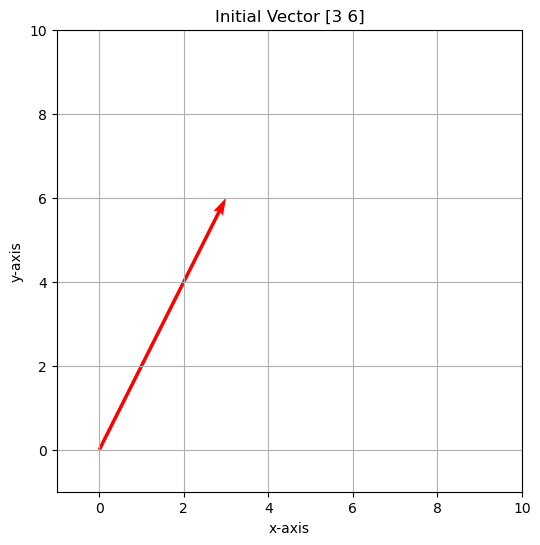

In [5]:
#We can represent this vector in 2d space using matplotlib
origin = [0, 0]

# Create the plot
plt.figure(figsize=(6, 6))
plt.quiver(*origin, *x, angles='xy', scale_units='xy', scale=1, color='r')

# Set plot limits and labels
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(f"Initial Vector {x}")
plt.grid(True)

# Show the plot
plt.show()

In [6]:
#What happens if we multiply matrix A by vector x?

#Luckily, numpy does this easily

#Let's call this new vector x1

x1 = A @ x

#We can represent both these vectors in 2d space

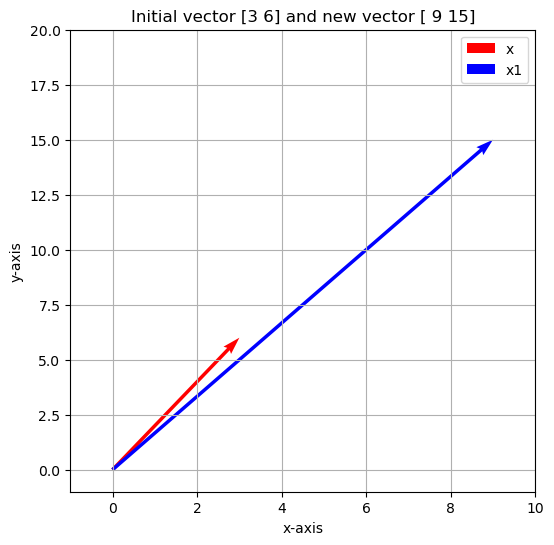

In [7]:
plt.figure(figsize=(6, 6))
plt.quiver(*origin, *x, angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(*origin, *x1, angles='xy', scale_units='xy', scale=1, color='b')

# Set plot limits and labels
plt.xlim(-1, 10)
plt.ylim(-1, 20)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(f"Initial vector {x} and new vector {x1}")
plt.legend(["x","x1"])
plt.grid(True)

# Show the plot
plt.show()

In [8]:
#As you can see from the diagram above, the new vector "x1" (blue) has been stretched with respect to initial vector "x" 
#It is also at a different angle

#So when we multiply matrix A by vector x, the resulting vector is stretched AND rotated. 
#*Rotated just means that we've changed the angle

#Let's try this with one more example using the same matrix, but a different vector

#We'll use vector y and we'll call the new vector y1

y = np.array([4, 1])
y1 = A @ y

print(f"y is {y}")
print("\n")
print(f"y1 is {y1}")

y is [4 1]


y1 is [12  6]


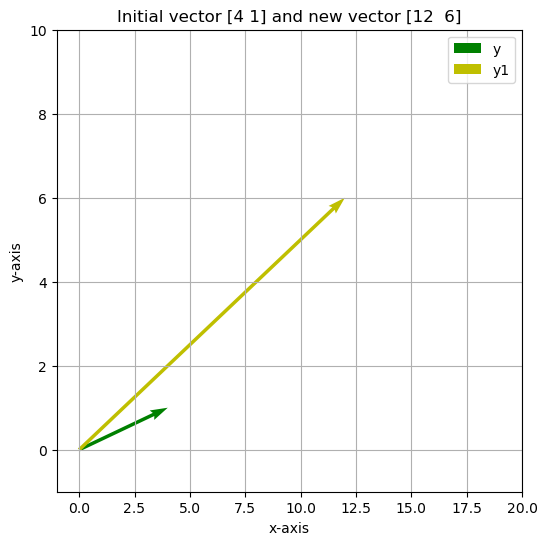

In [9]:
#Let's plot these vectors

plt.figure(figsize=(6, 6))
plt.quiver(*origin, *y, angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver(*origin, *y1, angles='xy', scale_units='xy', scale=1, color='y')

# Set plot limits and labels
plt.xlim(-1, 20)
plt.ylim(-1, 10)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(f"Initial vector {y} and new vector {y1}")
plt.legend(["y", "y1"])
plt.grid(True)

# Show the plot
plt.show()

In [10]:
#As you can see from the diagram above, the new resulting vector has also been stretched
#But it's been rotated in the opposite direction

#Okay great, but why do we care?

#Well we could keep multiplying matrix A by different vectors and getting new vectors that are stretched and rotate

#But is there a potential vector that when multiplied by matrix A, the resulting vector is stretched, but NOT rotated?

#consider the following vector "e" (for "eigen")

e = np.array([1, 1])

#Now let's multiply that by matrix "A"

e1 = A @ e

print(f"e is {e}")
print("\n")
print(f"e1 is {e1}")


e is [1 1]


e1 is [3 3]


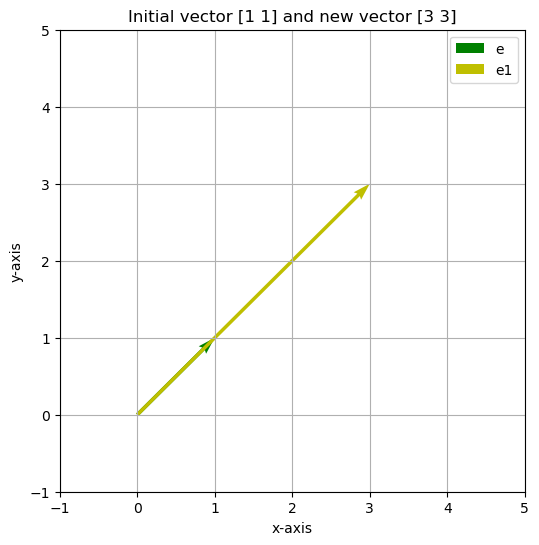

211370545

In [11]:
#You may have already begun to pickup on what has happened

#But let's plot e and e1

plt.figure(figsize=(6, 6))
plt.quiver(*origin, *e, angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver(*origin, *e1, angles='xy', scale_units='xy', scale=1, color='y')

# Set plot limits and labels
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(f"Initial vector {e} and new vector {e1}")
plt.legend(["e", "e1"])
plt.grid(True)

# Show the plot
plt.show()
211370545

This is a very interesting result. Unlike the results with vectors "x" and "y", the resulting vector of "e" when multiplied with matrix "A" has been stretched but NOT rotated

Both vector e and e1 are on the same axis

Vector "e", with respect to matrix "A", is known as an

# EIGENVECTOR

An eigenvector is a vector that when multiplied by a given matrix A, the resulting vector is stretched but NOT rotated

This is formally illustrated by the following algebraic equation:

# A*x̂ = λ*x̂

A = matrix
x̂ = eigenvector
λ = eigenvalue (scaling value)

What's most interesting about this formula is what's missing, mainly a rotation value. There is none.

Given a matrix A, multiplied by vector x̂ there is no rotation value because the resulting vector is NOT rotated.

Considering our example with vector "e" above, what is lambda ("eigenvalue")?

Well we started with [1, 1] and the resulting vector was [3, 3] 

So,

λ = 3 (in our example above)

Here are some key points about eigenvalues and eigenvectors:

1. There could theoretically be an infinite amount of eigenvectors per eigenvalue
2. There can only be n number of eigenvalues for a given matrix A, where n is the dimension of matrix A
3. Only square matrices have eigenvalues, non-square matrices do NOT have eigenvalues
4. Since matrix A has to be a square matrix, dimension n can correspond to either the row or column (they're the same number)


Okay well why do we care about eigenvectors and eigenvalues in the context of statistics, machine learning, etc.?

They only apply to square matrices and they only represent a highly specific property of those matrices

Think about when we have to use square matrices in statistics.

You probably wouldn't have a raw dataset as a square matrix, that would be very strange.

But no matter how many variables or entries you have in your dataset, something will always yield a square matrix

And that is 

#  A Covariance matrix

Since a covariance matrix is simply a measurement of how each variable changes with respect to every other variable, a covariance matrix will always be p x p dimension where p is the number of predictor variables in your dataset. 

Since a covariance matrix is square, it will most likely have a corresponding eigenvalue and eigenvectors assocaited with those values. 





In [12]:
#Let's consider the following data set 

df = pd.read_csv("Diabetes.csv")

#This dataset can be found in the corresponding data folder

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)

In [14]:
#This dataset has 768 entries and 9 variables

#In this case, the target variable "Outcome" is a binary variable indicating whether or not a patient has diabetes

#Because we are going to only concern ourselves with the predictor variables, we're going to exclude this variable

df = df.drop("Outcome", axis = 1)

In [15]:
df.shape

(768, 8)

We have 8 predictor variables

For the sake of this exercise, we want to reduce these variables into 1 or 2 "variables"

I use quotation marks around "variables" because any time you're reducing variables or dimension,the result is not a variable, but rather a combinatory projection of more than one variable

This might not seem necessary with 8 predictor variables, but when you're in a situation when you have 80,000 predictor variables, it comes in handy. 

Now why are we talking about dimesionality when we were just talking about eigenvectors/eigenvalues? 

There is a very popular dimesionality reduction algorithm known as

# Principal Component Analysis (PCA)

This algorithm is able to take many variables and project them into a shared axis or several shared axes. 

How does it do this?

It utilizes the eigenvectors and eigenvalues of the covariance matrix.

I'm going to take you through how to do this step by step and try to explain as much as I can.

You might be asking yourself "what does the eigenvector of a covariance matrix actually represent?"

In simple terms, the eigenvectors of a covariance matrix represent the direction or axis, which the data exhibits the most variance. 

NOT the eigenvector of the dataset itself, the eigenvector of the covariance matrix

Variance/covariance is information and so finding the direction of maximal variance is going to maximize the amount of information retained in the dimensionality reduction. 

Once we know the eigenvector of the covariance matrix, we can converge all the points in the dataset on this vector because we know that this vector maximally preserves the information.

# Vectors are LINEAR

I know that seems obvious, but think about what that entails. We are assuming that the data and relationships are also linear. There are other dimensionality reduction techniques that handle non-linear data, I actually have a separate project on this that you can find in my github. Right now, we're going to assume all the relationships are linear and move on.

One more key concept. We mentioned that the eigenVECTOR represents the DIRECTION of maximal variance, but the eigenVALUE is a scaling factor on the eigenVECTOR. So, it follows that the combination of the highest eigenvalue and eigenvector together yield the direction and magnitude of the maximal variance in the dataset. 

This combination of the highest eigenvalue and eigenvector is known as the 1st principal component. It will have several variables that have been projected into the principal component. The second highest eigenvalue + eigenvector combination is known as the 2nd principal component, and so on and so forth.

Typically the 1st and 2nd principal component explain about 95% of the variance and so only these two are chosen.

I'm getting ahead of myself, let's just start

Let's first calculate the covariance matrix of the dataset.....

In [16]:
#Before we calculate the covariance matrix, we actually have to STANDARDIZE the data

#standardizing is when you subtract the mean from each data point and divide by the standard deviation

#Pandas has a convenient function for this and I assume you know what these are

mean = df.mean()
std = df.std()

print("column means are:")
print(mean)
print("\n \n \n")
print("column standard deviations are:")
print(std)

column means are:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64

 
 

column standard deviations are:
Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
dtype: float64


In [17]:
#Now we can stadardize

sdf = (df - mean)/std

sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


When performing Principal Component Analysis (PCA), you should 

# standardize NOT normalize

as PCA is sensitive to feature scales and assumes a normal distribution, meaning standardization better aligns with its underlying assumptions and prevents features with larger ranges from dominating the analysis

Now that we've standardized the data, we can calculate the covariance matrix

In [18]:
#I am assuming you know what a covariance matrix is and how to calculate it

#Cov = SUM((xi - x-bar)(yi - ybar))/(n - 1)

#So it takes the difference between each point and the corresponding mean (for both x and y), multiplies them, sums them up

#Then divides by the number of entries, minus one

#Luckily pandas does this for us

covariance_matrix = sdf.cov()

covariance_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


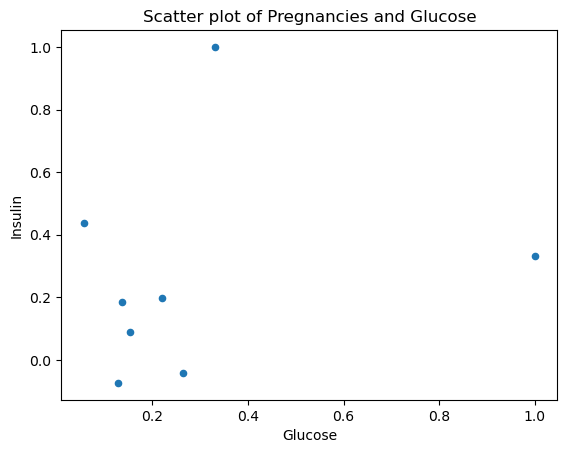

In [19]:
#You know the data has been successfully standardized because there is a diagonal line of 1's 
#Representing each variable's variance with itsef

#Now we need to find the eigenvector and eigenvalues of this covariance matrix

#Because we have 8 dimensions, we cannot visualize this like our earlier eigenvector method

#But think about two variables "glucose" and "insulin", 
#we know from our domain knowledge that they're at least a little correlated


covariance_matrix.plot.scatter(x='Glucose', y='Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter plot of Pregnancies and Glucose')
plt.show()

#Remember, we are plotting the covariance, NOT the dataset

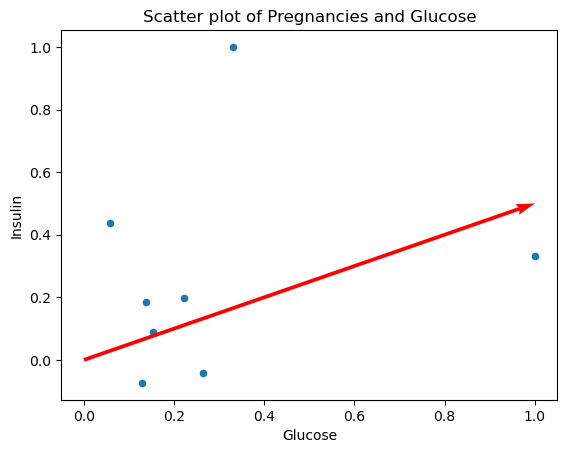

In [20]:
#Imagine representing these two covariances in a single shared projection 
#so that the majority of the shared variance is represented

#What direction would you choose?

#would the following direction work?
q = [1, 0.5]
covariance_matrix.plot.scatter(x='Glucose', y='Insulin')
plt.quiver(*origin, *q, angles='xy', scale_units='xy', scale=1, color='r')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter plot of Pregnancies and Glucose')
plt.show()

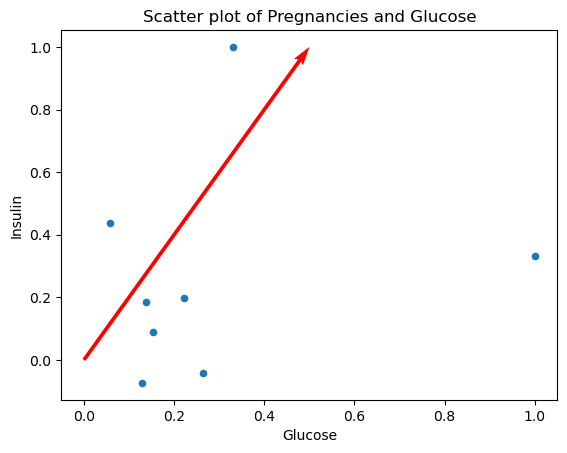

In [21]:
#what about this one?

q = [0.5, 1]
covariance_matrix.plot.scatter(x='Glucose', y='Insulin')
plt.quiver(*origin, *q, angles='xy', scale_units='xy', scale=1, color='r')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter plot of Pregnancies and Glucose')
plt.show()

In [22]:
#This is where the eigenvector becomes important

#If we find the eigenvector of our covariance matrix, then we can find the direction that maximally represents the variance
#Not just of insulin of glucose, but of all 8 predictor variables

#Luckily, numpy has a eigenvectors calculator, we are NOT going to do this out by hand, but if you're really interested

#I have a way of doing it by hand (below)

#First, in order to use this numpy eigenvector/eigenvalue function, we need to convert our covariance dataframe into a numpy array

np_covariance_matrix = covariance_matrix.values

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np_covariance_matrix.T @ np_covariance_matrix)

print("The eigenvalues are :")
print(eigenvalues)
print("\n \n \n")
print("The eigenvectors are:")
print(eigenvectors)

The eigenvalues are :
[4.38642736 2.99708855 1.06013767 0.76655111 0.58116896 0.46598152
 0.16358955 0.17624562]

 
 

The eigenvectors are:
[[-0.1284321  -0.59378583 -0.01308692  0.08069115 -0.47560573 -0.19359817
   0.11784098  0.58879003]
 [-0.39308257 -0.17402908  0.46792282 -0.40432871  0.46632804 -0.09416176
   0.45035526  0.06015291]
 [-0.36000261 -0.18389207 -0.53549442  0.05598649  0.32795306  0.6341159
  -0.01129554  0.19211793]
 [-0.43982428  0.33196534 -0.2376738   0.03797608 -0.48786206 -0.00958944
   0.5662838  -0.28221253]
 [-0.43502617  0.25078106  0.33670893 -0.34994376 -0.34693481  0.27065061
  -0.54862138  0.13200992]
 [-0.45194134  0.1009598  -0.36186463  0.05364595  0.25320376 -0.68537218
  -0.34151764  0.03536644]
 [-0.27061144  0.122069    0.43318905  0.8336801   0.11981049  0.08578409
  -0.00825873  0.08609107]
 [-0.19802707 -0.62058853  0.07524755  0.0712006  -0.10928996  0.03335717
  -0.21166198 -0.71208542]]


In [23]:
#How many eigenvalues/eigenvectors did we get?

print(eigenvectors.shape)
print(eigenvalues.shape)

(8, 8)
(8,)


In [24]:
#We had 8 predictor variables and now we have an eigenvalue/eigenvector combination for each dimension
#Additionally, the eigenvectors themselves have 8 values, corresponding to all 8 dimensions

#Now we want to sort the eigenvalues/eigenvectors based on magnitude, we want to choose the large ones

# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[i,:]) for i in range(len(eigenvalues))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Separate the sorted eigenvectors and eigenvalues into respective numpyarrays
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

#Let's look at our principal components
a = 1
for my_tuple in eig_pairs:
    print(f"Principal Component {a} is:\n")
    print(my_tuple)
    print("\n")
    a += 1


Principal Component 1 is:

(np.float64(4.386427355227946), array([-0.1284321 , -0.59378583, -0.01308692,  0.08069115, -0.47560573,
       -0.19359817,  0.11784098,  0.58879003]))


Principal Component 2 is:

(np.float64(2.997088550984555), array([-0.39308257, -0.17402908,  0.46792282, -0.40432871,  0.46632804,
       -0.09416176,  0.45035526,  0.06015291]))


Principal Component 3 is:

(np.float64(1.0601376675161758), array([-0.36000261, -0.18389207, -0.53549442,  0.05598649,  0.32795306,
        0.6341159 , -0.01129554,  0.19211793]))


Principal Component 4 is:

(np.float64(0.7665511065514126), array([-0.43982428,  0.33196534, -0.2376738 ,  0.03797608, -0.48786206,
       -0.00958944,  0.5662838 , -0.28221253]))


Principal Component 5 is:

(np.float64(0.5811689621813915), array([-0.43502617,  0.25078106,  0.33670893, -0.34994376, -0.34693481,
        0.27065061, -0.54862138,  0.13200992]))


Principal Component 6 is:

(np.float64(0.465981516030428), array([-0.45194134,  0.1009598 , 

In [25]:
#Let's say we only really care about the first TWO principal components
#We can choose them from the sort eigenvector numpy array array

#This choice of how many principal components to use is a hyperparameter "k"

#Let's set k = 2

k = 2

principal_components = eig_vecs_sorted[:k, :]

print(principal_components)

[[-0.1284321  -0.59378583 -0.01308692  0.08069115 -0.47560573 -0.19359817
   0.11784098  0.58879003]
 [-0.39308257 -0.17402908  0.46792282 -0.40432871  0.46632804 -0.09416176
   0.45035526  0.06015291]]


So a lot of times k is determined by looking at what percent of the total variance is explained by k amount of principal components

We can plot a graph of "Cumulative Explained Variance" with respect to the number of principal components

We can then set k according to the graph and our expectations

Explained variance: [41.39 28.28 10.    7.23  5.48  4.4   1.66  1.54]
Cumulative explained variance: [41.39 69.67 79.67 86.9  92.38 96.78 98.44 99.98]


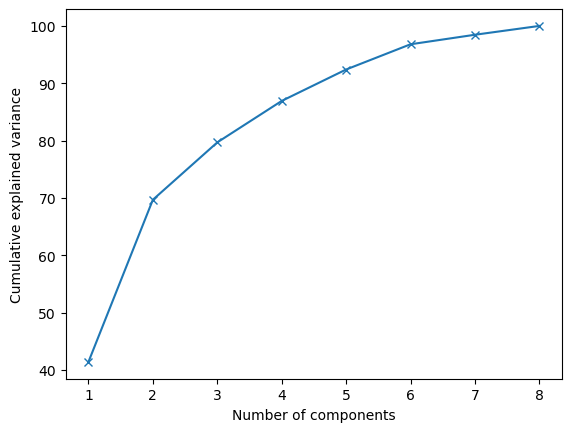

In [26]:
#The following code is used to calculate and plot the cumulative explained variance with respect to number of principal components

#sum eigenvalues, this will yield the total scaled variance
eigenvalues_sum = sum(eigenvalues)

#Calculate the explained variance per principal component/eigenvector
#Use sorted because you need to start with the largest
#Round to two decimals
explained_variance = np.round([(i / eigenvalues_sum)*100 for i in eig_vals_sorted], 2)


#Now calculate the cumulative explained variance
#Np cumsum just takes the value in each index and adds it to the previous
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

#Plot 1 through number of features, the cumulative explained variance
plt.plot(np.arange(1,9), cum_explained_variance, '-x')
plt.xticks(np.arange(1,9))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

You can see from this chart that the first principal component only explains about 40% of the variance and adding the 2nd principal component only gets us to 70%. 

How do we interpret this? 

Well these variables do not have a high degree of covariance, we saw that from the covariance matrix. This means that there isn't a clean way of capturing shared variance in a projected dimension. After all this, we should definitely not use PCA on this dataset. We weren't going to use it anyway, there are only 8 variables and 768 entries, we would unnecessarily forfeit information in the dimensionality reduction. 

PCA from scratch pt 2, where we use PCA on a larger dataset with more higher covariance amoung variables.

In [27]:
#EIGENVECTOR calculator (by hand)

#We do use numpy including for calculating eigenvalues

#Even calculating eigenvalues for a simple 2 x 2 matrix requires a ton of matrix multiplication

#The moment you start using 3 x 3 or 4 x 4, etc. you run into submatrices, which will make this markdown too long

def calculate_eigenvectors(matrix):
    """
    Calculates eigenvalues and eigenvectors of a square matrix.

    Args:
        matrix: A square NumPy array.

    Returns:
        A tuple containing:
          - A NumPy array of eigenvalues.
          - A NumPy array of eigenvectors (columns correspond to eigenvalues).
    """
    # 1. Calculate Eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)

    # 2. Calculate Eigenvectors
    eigenvectors = []
    for eigenvalue in eigenvalues:
        # Form the matrix (A - λI)
        matrix_a_minus_lambda_i = matrix - eigenvalue * np.eye(matrix.shape[0])

        # Solve the system (A - λI)v = 0
        # For simplicity, use lstsq to find a solution (even if not unique)
        _, _, v = np.linalg.svd(matrix_a_minus_lambda_i)
        eigenvector = v[-1]

        # Normalize the eigenvector
        eigenvector_normalized = eigenvector / np.linalg.norm(eigenvector)
        eigenvectors.append(eigenvector_normalized)
    return eigenvalues, np.array(eigenvectors).T

#I just used random numbers to make a matrix (numpy array)

#Make sure that the matrix is square, same amount of columns and rows

matrix_a = np.array([[1, -1, 3],
                     [3, 4, 4],
                    [5, 3, 2]])

eigenvalues, eigenvectors = calculate_eigenvectors(matrix_a)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [ 7.42148722  2.41915199 -2.84063921]
Eigenvectors:
 [[ 0.14502346 -0.51126229 -0.63343163]
 [ 0.80298622  0.85828521 -0.16435276]
 [ 0.57808418  0.0442421   0.7561432 ]]
